In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/New folder

/content/drive/MyDrive/New folder


In [ ]:
ls

Flowers-Dataset.zip


In [ ]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  infla

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range = 0.2,horizontal_flip =True,vertical_flip =False)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/New folder/flowers/daisy",target_size = (10,10),class_mode ='categorical',batch_size=10)

Found 0 images belonging to 0 classes.


In [ ]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/New folder/flowers/rose",target_size = (1,5),class_mode ='categorical',batch_size=10)

Found 0 images belonging to 0 classes.


In [ ]:
x_train.class_indices

{}

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [ ]:
model= Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation = 'relu')) #Feature Map

In [ ]:
model.add(MaxPooling2D(pool_size = (2,2)))  #Pooled Matrix

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
32*(3*3*3+1)

896

In [ ]:
model.add(Dense(300, activation = 'relu'))
model.add(Dense(150,activation ='relu'))

In [ ]:
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
len(x_train)

0

In [ ]:
1238/24

51.583333333333336

In [ ]:
len(x_test)

0

In [ ]:
326/24

13.583333333333334

In [ ]:
ls

flowers/  Flowers-Dataset.zip


In [ ]:
model.save('flowers.h5')

In [ ]:
ls

flowers/  Flowers-Dataset.zip  flowers.h5


In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model('flowers.h5')

In [ ]:
pwd

'/content/drive/MyDrive/New folder'

In [ ]:
img = image.load_img(r'/content/drive/MyDrive/New folder/flowers/daisy/43474673_7bb4465a86.jpg')

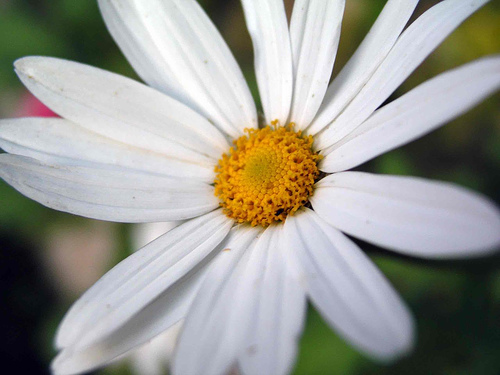

In [ ]:
img

In [ ]:
img = image.load_img(r'/content/drive/MyDrive/New folder/flowers/daisy/43474673_7bb4465a86.jpg',target_size=(64,64))

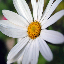

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[ 74.,  83.,  66.],
        [ 51.,  68.,  49.],
        [ 40.,  57.,  38.],
        ...,
        [164., 181., 201.],
        [ 64.,  75.,  61.],
        [ 51.,  57.,  21.]],

       [[ 66.,  83.,  64.],
        [ 50.,  73.,  47.],
        [ 43.,  61.,  37.],
        ...,
        [ 84.,  83.,  65.],
        [ 70.,  78.,  21.],
        [ 55.,  62.,  18.]],

       [[ 66.,  85.,  53.],
        [ 56.,  82.,  47.],
        [ 49.,  74.,  44.],
        ...,
        [ 91.,  87.,  13.],
        [ 77.,  83.,  11.],
        [ 76.,  80.,  19.]],

       ...,

       [[  3.,   1.,  15.],
        [  4.,   2.,  16.],
        [  5.,   3.,  17.],
        ...,
        [ 22.,  38.,  27.],
        [ 22.,  38.,  27.],
        [ 18.,  34.,  23.]],

       [[  3.,   1.,  15.],
        [  3.,   1.,  15.],
        [  3.,   1.,  15.],
        ...,
        [ 24.,  40.,  29.],
        [ 21.,  37.,  26.],
        [ 19.,  35.,  24.]],

       [[  3.,   1.,  15.],
        [  3.,   1.,  15.],
        [  3.,  

In [ ]:
x.shape

(64, 64, 3)

In [ ]:
x= np.expand_dims(x,axis=0)

In [ ]:
y = np.argmax(model.predict(x), axis=1)

In [ ]:
y

array([1])

In [ ]:
x_train.class_indices

{}

In [ ]:
index = ['daisy','dandelion','rose','sunflower','tulip']

In [ ]:
index[y[0]]

'dandelion'

In [ ]:
index[3]

'sunflower'